# Programming Project 1 analysis using EDA tools

### Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset and save it to a dataframe named 'df'
df=pd.read_csv('proj1.csv')

In [3]:
df.head()

,Intials,Date,Course ID,Time(m),Summary
0,LH,1/9/23,Chem-109,15.0,Took notes on recorded lecture
1,LH,1/10/23,ENG-101,10.0,Read the assigned reading
2,LH,1/10/23,BUSA-245,5.0,Skimmed assigned reading
3,LH,1/13/23,PHIL-301,50.0,Watched recorded lecture
4,LH,1/15/23,Chem-109,40.0,Did the online lab


In [4]:
df = df.dropna()

In [47]:
df['Course ID'] = df['Course ID'].str.upper()


### Investigate your dataset using pandas modules and do the tasks. At the end the dataframe will be look like: 
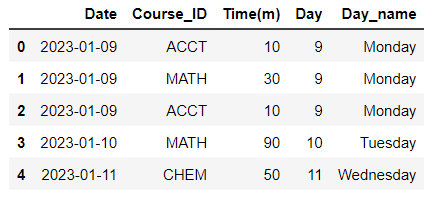

# Is there any column you want to drop? If yes which column and why?
# i want to drop the summary column cause what i did for the class is pretty predictable and doesnt
# tell me much and the intials column because they are clearly all my entries

In [48]:
df.drop('Summary', axis=1, inplace=True)
df.drop('Intials', axis=1, inplace=True)

KeyError: "['Summary'] not found in axis"

In [ ]:
df.head()

In [49]:
# Convert the date column to datetime

df['Date'] =  pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       37 non-null     datetime64[ns]
 1   Course ID  37 non-null     object        
 2   Time(m)    37 non-null     float64       
 3   Day        37 non-null     int64         
 4   Day_name   37 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [50]:
# Calculate the day of the month and create a new column named 'Day'
df['Day']=df['Date'].dt.day

In [51]:
# Create a new column called Day_name using  .dt.day_name()
df['Day_name']=df['Date'].dt.day_name()

In [52]:
df.head(100)

,Date,Course ID,Time(m),Day,Day_name
0,2023-01-09,CHEM-109,15.0,9,Monday
1,2023-01-10,ENG-101,10.0,10,Tuesday
2,2023-01-10,BUSA-245,5.0,10,Tuesday
3,2023-01-13,PHIL-301,50.0,13,Friday
4,2023-01-15,CHEM-109,40.0,15,Sunday
5,2023-01-17,ENG-101,10.0,17,Tuesday
6,2023-01-18,DS-160,15.0,18,Wednesday
7,2023-01-19,CHEM-109,25.0,19,Thursday
8,2023-01-20,DS-160,25.0,20,Friday
9,2023-01-20,BUSA-245,20.0,20,Friday


### Answer the questions

In [53]:
# What is the average time you have spend for learning?
df.describe()

,Time(m),Day
count,37.000000,37.000000
mean,28.108108,15.081081
std,25.037509,8.541983
min,5.000000,1.000000
25%,15.000000,9.000000
50%,25.000000,13.000000
75%,30.000000,22.000000
max,120.000000,30.000000


## The average time spent learning is 28.108108 minutes

In [54]:
# Display all of the entries where you have spent more than the average time to learn 
(df[df['Time(m)'] >  28.108108])

,Date,Course ID,Time(m),Day,Day_name
3,2023-01-13,PHIL-301,50.0,13,Friday
4,2023-01-15,CHEM-109,40.0,15,Sunday
13,2023-01-24,CHEM-109,30.0,24,Tuesday
14,2023-01-25,CHEM-109,120.0,25,Wednesday
15,2023-01-26,PHIL-301,45.0,26,Thursday
24,2023-02-04,ENG-101,120.0,4,Saturday
28,2023-02-08,PHIL-301,30.0,8,Wednesday
29,2023-02-09,CHEM-109,45.0,9,Thursday
30,2023-02-10,DS-160,50.0,10,Friday
31,2023-02-10,BUSA-245,30.0,10,Friday


In [55]:
# Which course you have spent the maximum time to prepare?
maxtime=df.groupby('Course ID')['Time(m)'].sum()
maxtime.sort_values(ascending=False).index[0]

'CHEM-109'

# the most time was spent on chem-109

In [56]:
# Which day of the week you sepent most of the time?
dayofweek = df.groupby('Day_name').size()
dayofweek.sort_values(ascending=False).index[0]




'Friday'

## I spent the most time on friday

### Investigate the distribution of Time, adding the mean. How the data distributed?
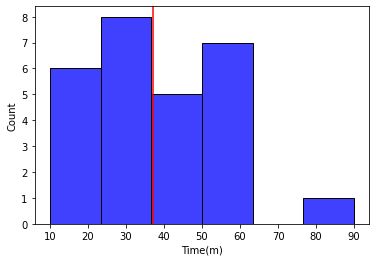

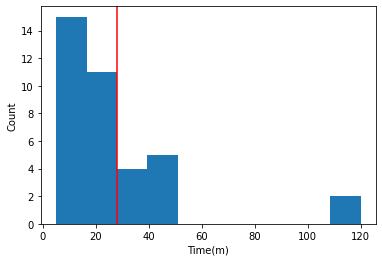

In [57]:
plt.hist(df['Time(m)'])
plt.xlabel('Time(m)')
plt.ylabel('Count')
plt.axvline(28.108108, color='r', linestyle='-')
plt.show()



# the data is right skewed

In [58]:
df.head()

,Date,Course ID,Time(m),Day,Day_name
0,2023-01-09,CHEM-109,15.0,9,Monday
1,2023-01-10,ENG-101,10.0,10,Tuesday
2,2023-01-10,BUSA-245,5.0,10,Tuesday
3,2023-01-13,PHIL-301,50.0,13,Friday
4,2023-01-15,CHEM-109,40.0,15,Sunday


### Investigate Total time by Day using bar plot - Remove the Confidence Interval - By Course ID. Comment on your findings
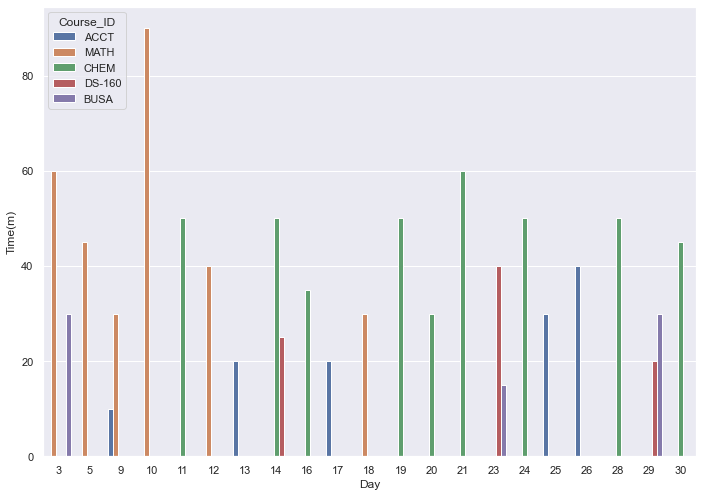

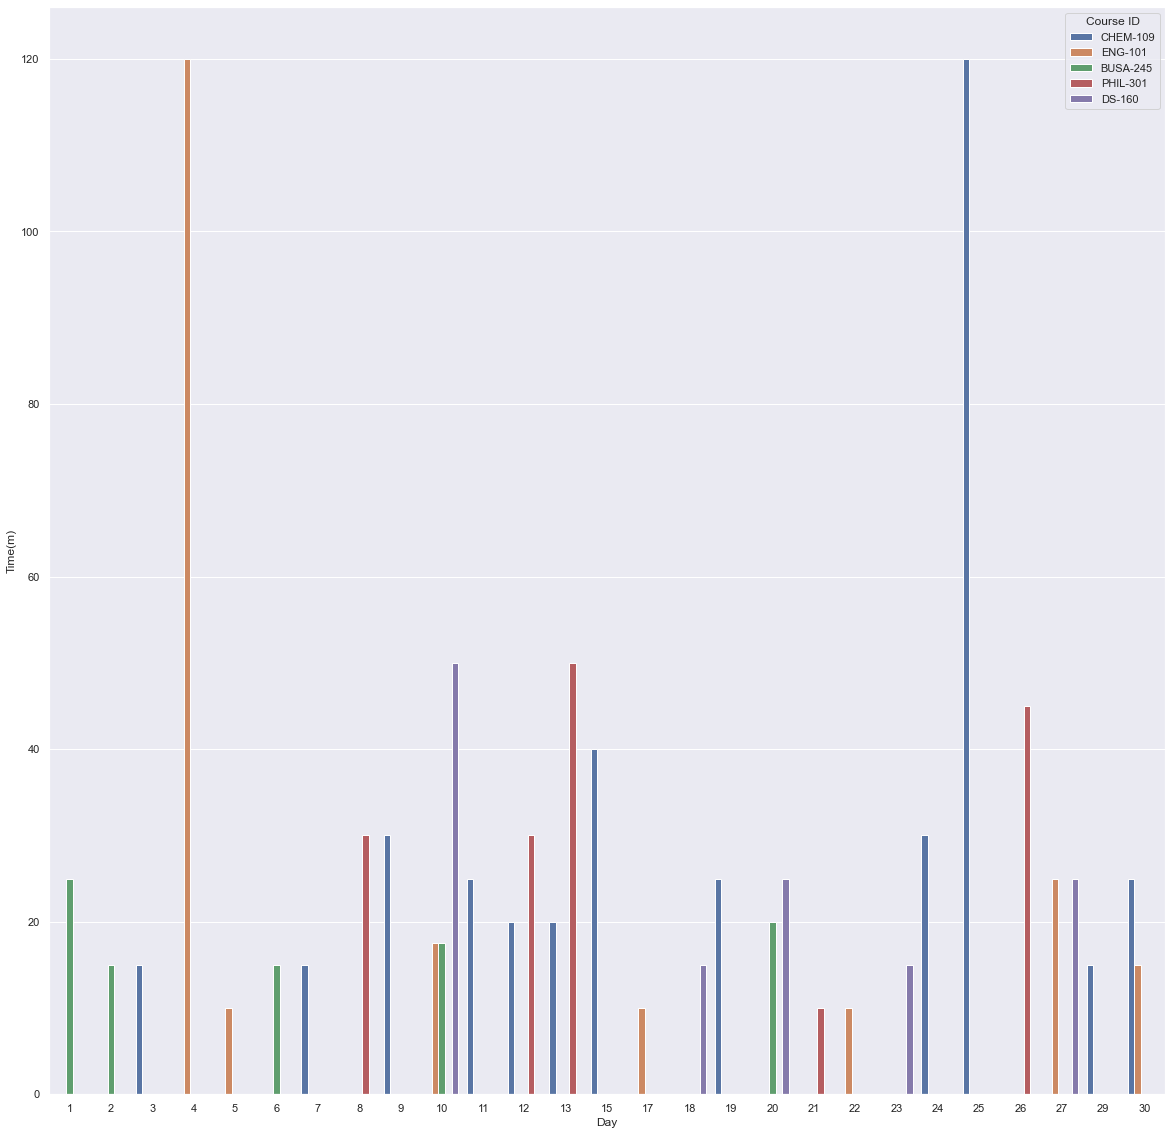

In [81]:
barplot=sns.barplot(x='Day',
                   y='Time(m)',
                   data=df,
                   ci=False,
                   hue='Course ID')
sns.set(rc={'figure.figsize':(8,6)})

# days and time spread is pretty consistent. The most time i worked was 120 minutes on the 25th and 4th

### Investigate the measure of dispersion (table and plot) of time column.
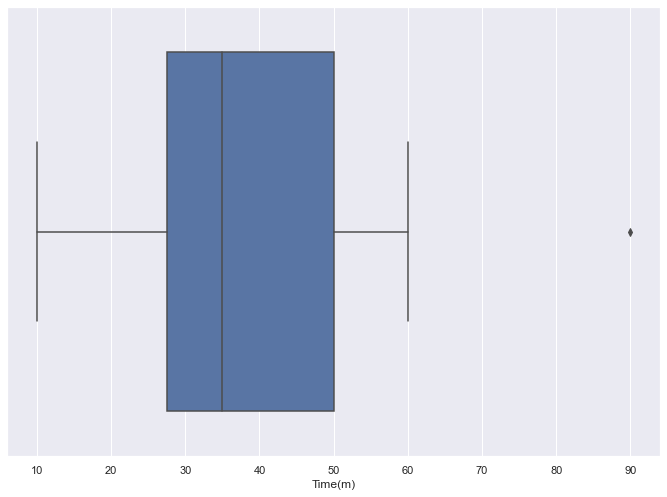

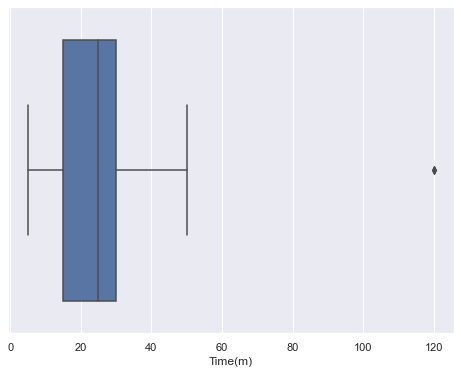

In [82]:
box_plot=sns.boxplot(x='Time(m)',
                    data=df)

In [89]:
df['Time(m)'].describe()

count     37.000000
mean      28.108108
std       25.037509
min        5.000000
25%       15.000000
50%       25.000000
75%       30.000000
max      120.000000
Name: Time(m), dtype: float64

# most entries fall between 20 and 30 but there are outliers at 120

### Investigate the the distribution of time by Day_name
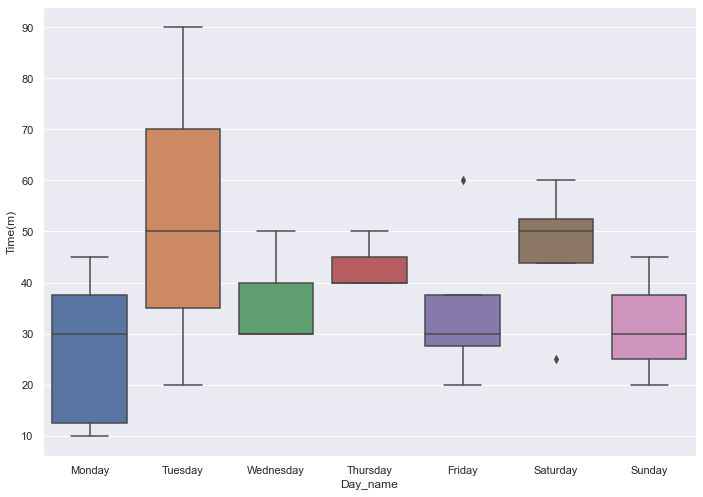

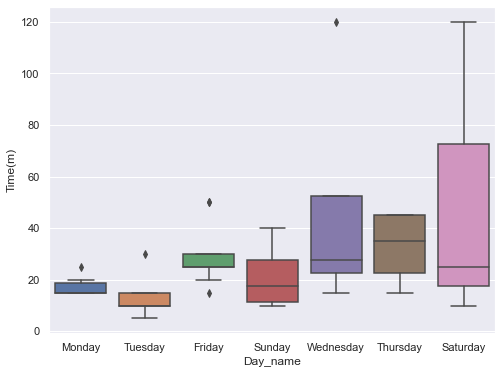

In [91]:
boxplot=sns.boxplot(x='Day_name',
                   y=df['Time(m)'],
                   data=df)

# Most days are pretty similar, while monday, tuesday and friday had the smallest distribution. Saturday had the largest distribution

### Use lmplots to plot Day and Time , remove error bar, add hue and display by column
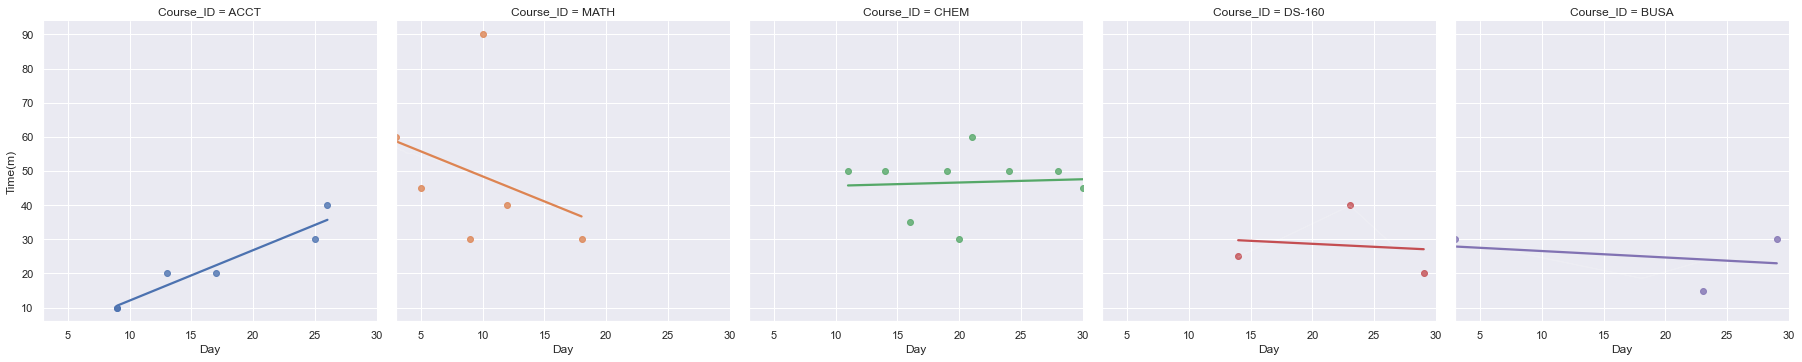

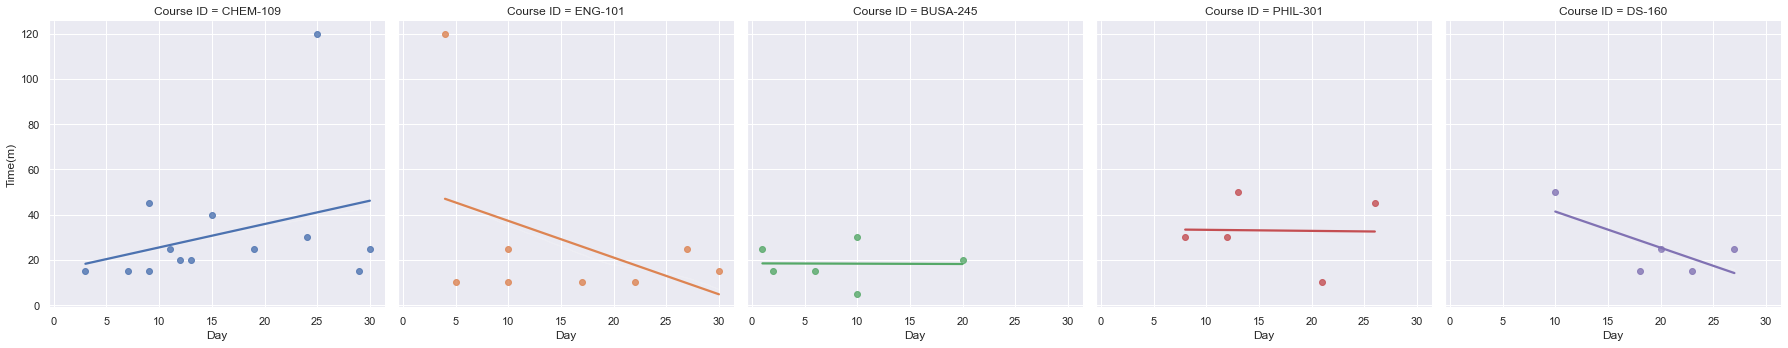

In [94]:
lmplot=sns.lmplot(x='Day',
                 y='Time(m)',
                 data=df,
                 ci=False,
                 hue='Course ID',
                 col='Course ID')

### Create a pair plot of Day and Time and add course id as hue
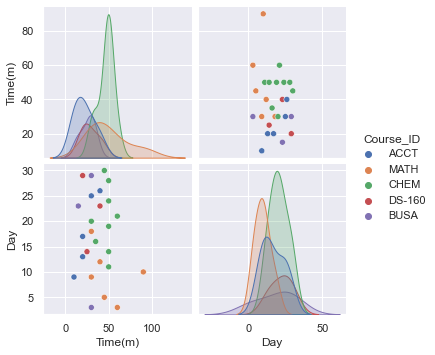

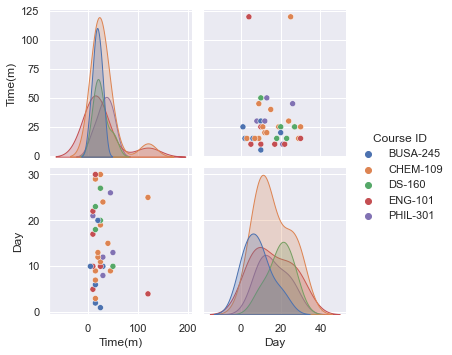

In [109]:


pairplot=sns.pairplot(df[['Time(m)','Day', 'Course ID']], hue='Course ID')

In [106]:
df.head()

,Date,Course ID,Time(m),Day,Day_name
0,2023-01-09,CHEM-109,15.0,9,Monday
1,2023-01-10,ENG-101,10.0,10,Tuesday
2,2023-01-10,BUSA-245,5.0,10,Tuesday
3,2023-01-13,PHIL-301,50.0,13,Friday
4,2023-01-15,CHEM-109,40.0,15,Sunday


### Display the Heatmap and comment on your findings
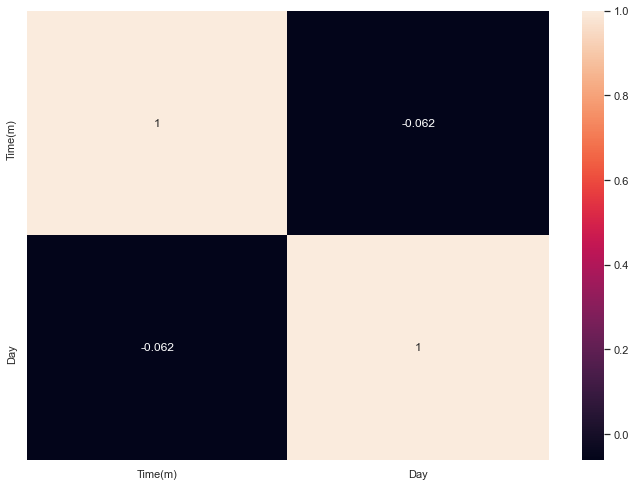

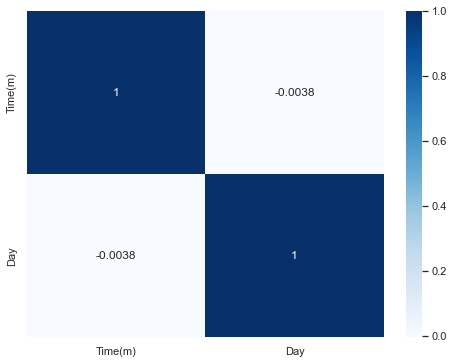

In [111]:
cols=['Time(m)','Day']
heatmapcorr=df[['Time(m)','Day']].corr(method='pearson')
heatmap=sns.heatmap(heatmapcorr, annot=True,
                   xticklabels=cols,
                   yticklabels=cols,
                   cmap='Blues')


# There is essentially no correlation between day and time since the values are negative